In [172]:
# ==============================================================

# load libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [173]:
# load & explore dataset

# Load dataset
data = pd.read_csv("../Data/heart_disease_uci.csv")

# Display basic dataset info
print(data.head())  # Verify it loads correctly
print(data.info())  # Check column types
print(data.describe())  # Statistical summary

   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class 'pandas.core.frame.DataFr

In [174]:
# ========================================
#  Data Preparation - Regression
# ========================================
# Split data into features (X) and target variable (y)
X_reg = data.drop(columns=['chol'])  # Features (all except 'chol')
y_reg = data['chol']  # Target variable (cholesterol levels)

# Verify the shape of X and y
print(f"X_reg shape: {X_reg.shape}, y_reg shape: {y_reg.shape}")


X_reg shape: (920, 14), y_reg shape: (920,)


In [175]:
# ========================================
#  Handle Missing Values
# ========================================
# Fill missing numeric values with column mean
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

# Fill missing categorical/ordinal values with mode (most frequent value)
for col in ['fbs', 'restecg', 'exang', 'slope', 'thal']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify missing values are handled
print(data.isnull().sum())  # Should print all zeros

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\siyan\AppData\Local\Temp\ipykernel_3384\1757374998.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [176]:
# ========================================
#  Data Preprocessing - Train-Test Split
# ========================================
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Ensure the dimensions are correct
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Verify missing values in train-test sets
print(X_train.isnull().sum())
print(y_train.isnull().sum())

X_train shape: (736, 14), y_train shape: (736,)
X_test shape: (184, 14), y_test shape: (184,)
age           0
sex           0
dataset       0
cp            0
trestbps     45
fbs          80
restecg       1
thalch       42
exang        42
oldpeak      45
slope       238
ca          486
thal        390
num           0
dtype: int64
0


In [180]:
# ========================================
#  One-Hot Encoding for Categorical Features
# ========================================
# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Verify the final structure
print(X_train.dtypes)  # Should contain only numeric types
print(X_train.head())

age                           int64
trestbps                    float64
thalch                      float64
oldpeak                     float64
ca                          float64
num                           int64
sex_Male                       bool
dataset_Hungary                bool
dataset_Switzerland            bool
dataset_VA Long Beach          bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
fbs_True                       bool
restecg_normal                 bool
restecg_st-t abnormality       bool
exang_True                     bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object
     age  trestbps  thalch  oldpeak   ca  num  sex_Male  dataset_Hungary  \
880   62       NaN   120.0      3.0  NaN    4      True            False   
457   54     150.0   122.0      0.0  NaN    0      True             True   
79

In [181]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [182]:
# ========================================
#  Train & Evaluate Linear Regression
# ========================================

# Initialize Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Make predictions on test data
predictions = model.predict(X_test)

# Ensure predictions have valid values (replace negatives)
predictions = np.maximum(predictions, 0)

# Compute model evaluation metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)  # Compute MSE
rmse = np.sqrt(mse)  # Compute RMSE manually

# Print evaluation results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.5254
RMSE: 74.8937


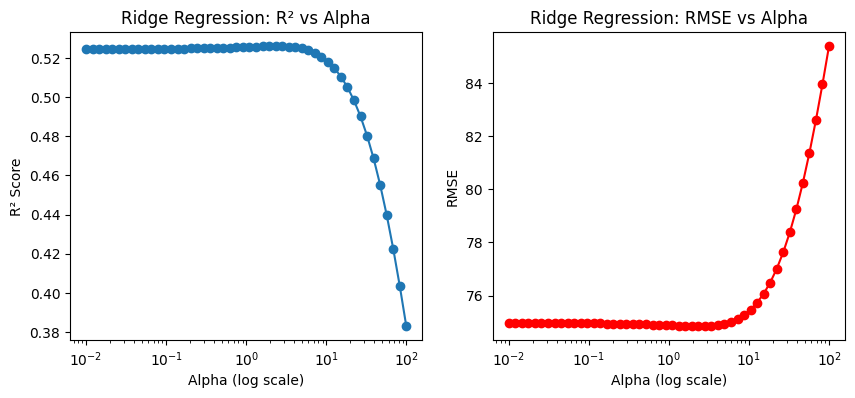

In [183]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Define alpha values for tuning
alphas = np.logspace(-2, 2, 50)
r2_scores = []
rmse_scores = []

# Train Ridge Regression for different alpha values
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    predictions = ridge_model.predict(X_test)
    
    r2_scores.append(r2_score(y_test, predictions))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, predictions)))

# Plot R² and RMSE vs. alpha values
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Ridge Regression: R² vs Alpha")

plt.subplot(1, 2, 2)
plt.plot(alphas, rmse_scores, marker='o', color='red')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge Regression: RMSE vs Alpha")

plt.show()


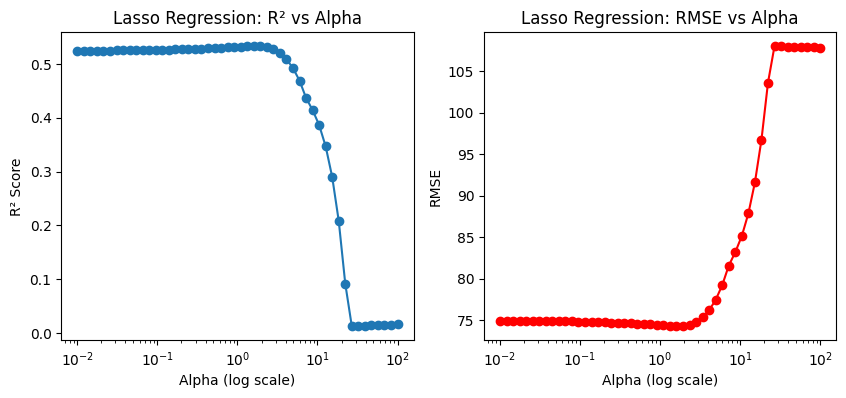

In [184]:
from sklearn.linear_model import Lasso

lasso_r2_scores = []
lasso_rmse_scores = []

# Train Lasso Regression for different alpha values
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    predictions = lasso_model.predict(X_test)
    
    lasso_r2_scores.append(r2_score(y_test, predictions))
    lasso_rmse_scores.append(np.sqrt(mean_squared_error(y_test, predictions)))

# Plot R² and RMSE for Lasso
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_r2_scores, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Lasso Regression: R² vs Alpha")

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_rmse_scores, marker='o', color='red')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Lasso Regression: RMSE vs Alpha")

plt.show()


In [185]:
# Define features (X) and target (y) for classification
X_clf = data.drop(columns=['num'])  # Features (exclude target column 'num')
y_clf = data['num']  # Target variable (presence of heart disease)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Convert categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns to ensure compatibility
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Verify dataset shape
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (736, 21), y_train shape: (736,)
X_test shape: (184, 21), y_test shape: (184,)


In [186]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [187]:
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))


y_test unique values: [0 1 2 3 4]
y_pred unique values: [0 1 2 3 4]


In [188]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class


In [189]:
y_pred_proba = log_model.predict_proba(X_test_scaled)  # Get probability estimates


In [190]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")  # Use probability predictions


In [191]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Make predictions
y_pred = log_model.predict(X_test_scaled)  # Get class predictions
y_pred_proba = log_model.predict_proba(X_test_scaled)  # Get probability estimates

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")  # Fix for multi-class
auroc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")  # Fix for multi-class AUROC
auprc = average_precision_score(y_test, y_pred_proba, average="weighted")  # Fix for multi-class AUPRC

# Print evaluation metrics
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}")


Logistic Regression - Accuracy: 0.5761, F1 Score: 0.5430, AUROC: 0.8204, AUPRC: 0.6240


In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Initialize and train k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this hyperparameter
knn_model.fit(X_train_scaled, y_train)  # Train k-NN model

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)  # Class predictions
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)  # Probability estimates

# Evaluate k-NN model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")  # Multi-class fix
auroc_knn = roc_auc_score(y_test, y_pred_knn_proba, multi_class="ovr")  # AUROC fix
auprc_knn = average_precision_score(y_test, y_pred_knn_proba, average="weighted")  # AUPRC fix

# Print evaluation metrics
print(f"k-NN Classifier - Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}, AUROC: {auroc_knn:.4f}, AUPRC: {auprc_knn:.4f}")


k-NN Classifier - Accuracy: 0.5272, F1 Score: 0.5005, AUROC: 0.6925, AUPRC: 0.5636


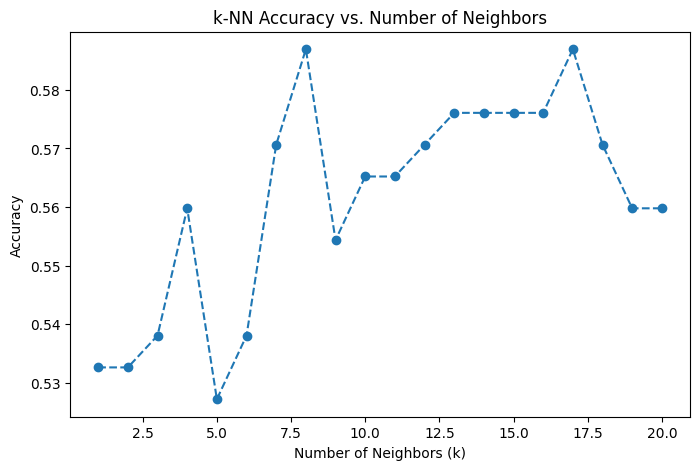

Best k: 8, Accuracy: 0.5870


In [193]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(1, 21)  # Test k from 1 to 20
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_knn))

# Plot Accuracy vs. k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy vs. Number of Neighbors")
plt.show()

# Best k selection
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k: {best_k}, Accuracy: {max(accuracy_scores):.4f}")


In [202]:
# Store model results in a dictionary for easy comparison
model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUROC": auroc,
        "AUPRC": auprc,
    },
    "k-NN (k=best_k)": {
        "Accuracy": accuracy_knn,
        "F1 Score": f1_knn,
        "AUROC": auroc_knn,
        "AUPRC": auprc_knn,
    }
}




In [203]:
import pandas as pd

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(model_results)

# Display the DataFrame using print()
print("\nModel Comparison Results:")
print(results_df)



Model Comparison Results:
          Logistic Regression  k-NN (k=best_k)
Accuracy             0.576087         0.527174
F1 Score             0.542983         0.500539
AUROC                0.820395         0.692542
AUPRC                0.623984         0.563588


<Figure size 1000x600 with 0 Axes>

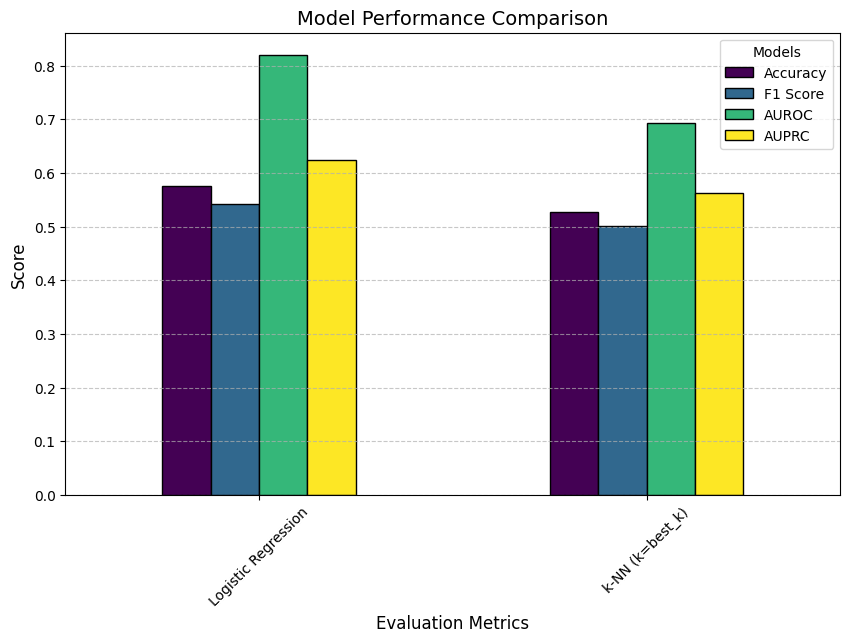

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame (if not already done)
results_df = pd.DataFrame(model_results)

# Transpose for better visualization
results_df = results_df.T  

# Plot bar chart
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Evaluation Metrics", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


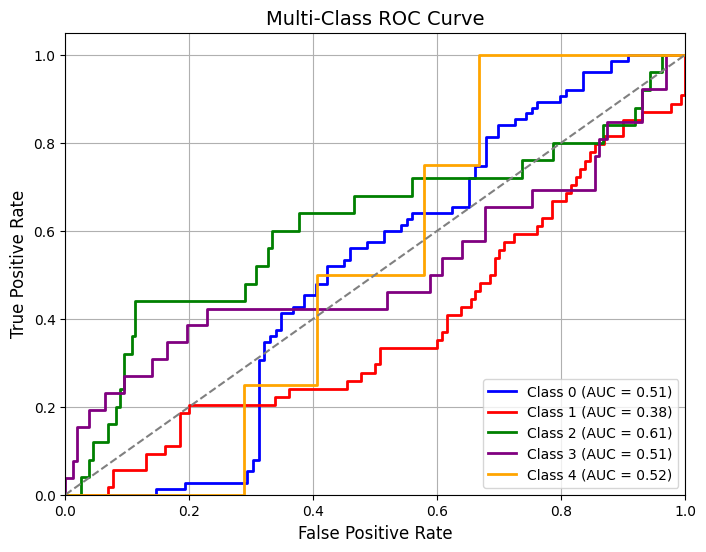

In [204]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
n_classes = len(np.unique(y_test))  # Should be 5

# Convert y_test to one-hot encoding
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Get probability predictions for each class
y_pred_prob_log = log_model.predict_proba(X_test)  # Logistic Regression Probabilities
y_pred_prob_knn = knn_model.predict_proba(X_test)  # k-NN Probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot Multi-Class ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [205]:
print("Shape of k-NN probabilities:", knn_model.predict_proba(X_test).shape)


Shape of k-NN probabilities: (184, 5)


c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [206]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_model, "best_model_logistic_regression.pkl")

print("Best model saved successfully!")


Best model saved successfully!


c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


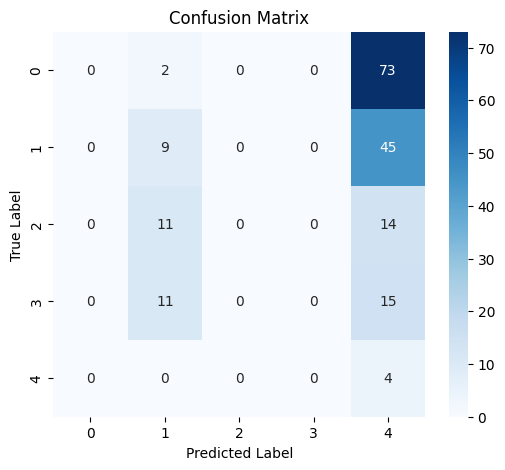


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.27      0.17      0.21        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.03      1.00      0.05         4

    accuracy                           0.07       184
   macro avg       0.06      0.23      0.05       184
weighted avg       0.08      0.07      0.06       184



c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [207]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for final evaluation
y_pred_final = log_model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


In [1]:
import matplotlib.pyplot as plt

# Save Confusion Matrix
plt.savefig("confusion_matrix.png", bbox_inches='tight')

# Save ROC Curve
plt.savefig("roc_curve.png", bbox_inches='tight')

print("Images saved successfully!")


Images saved successfully!


<Figure size 640x480 with 0 Axes>